In [36]:
import pandas as pd
import numpy  as py 
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
DATA=pd.read_csv(r'C:\Users\abdel\OneDrive\Desktop\heart.csv')


EXPLORE DATA


In [38]:
DATA.head(7)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0


In [39]:
DATA.shape

(918, 12)

In [40]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [41]:
DATA.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [42]:
DATA.isnull()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
913,False,False,False,False,False,False,False,False,False,False,False,False
914,False,False,False,False,False,False,False,False,False,False,False,False
915,False,False,False,False,False,False,False,False,False,False,False,False
916,False,False,False,False,False,False,False,False,False,False,False,False


In [43]:
DATA.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<Axes: >

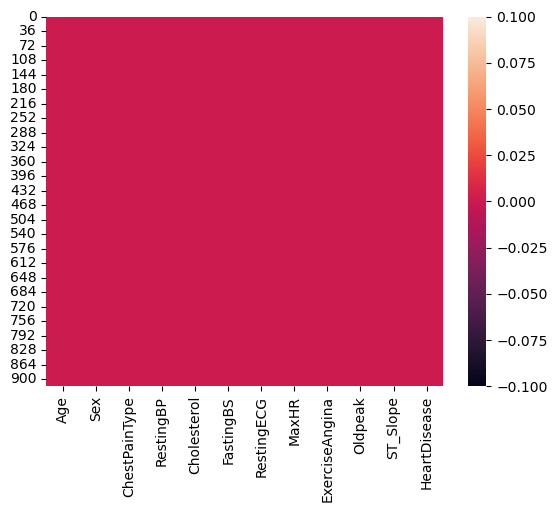

In [44]:
sns.heatmap(DATA.isnull())

In [45]:
DATA.duplicated().sum()

0

ANALYSIS


In [46]:
DATA['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

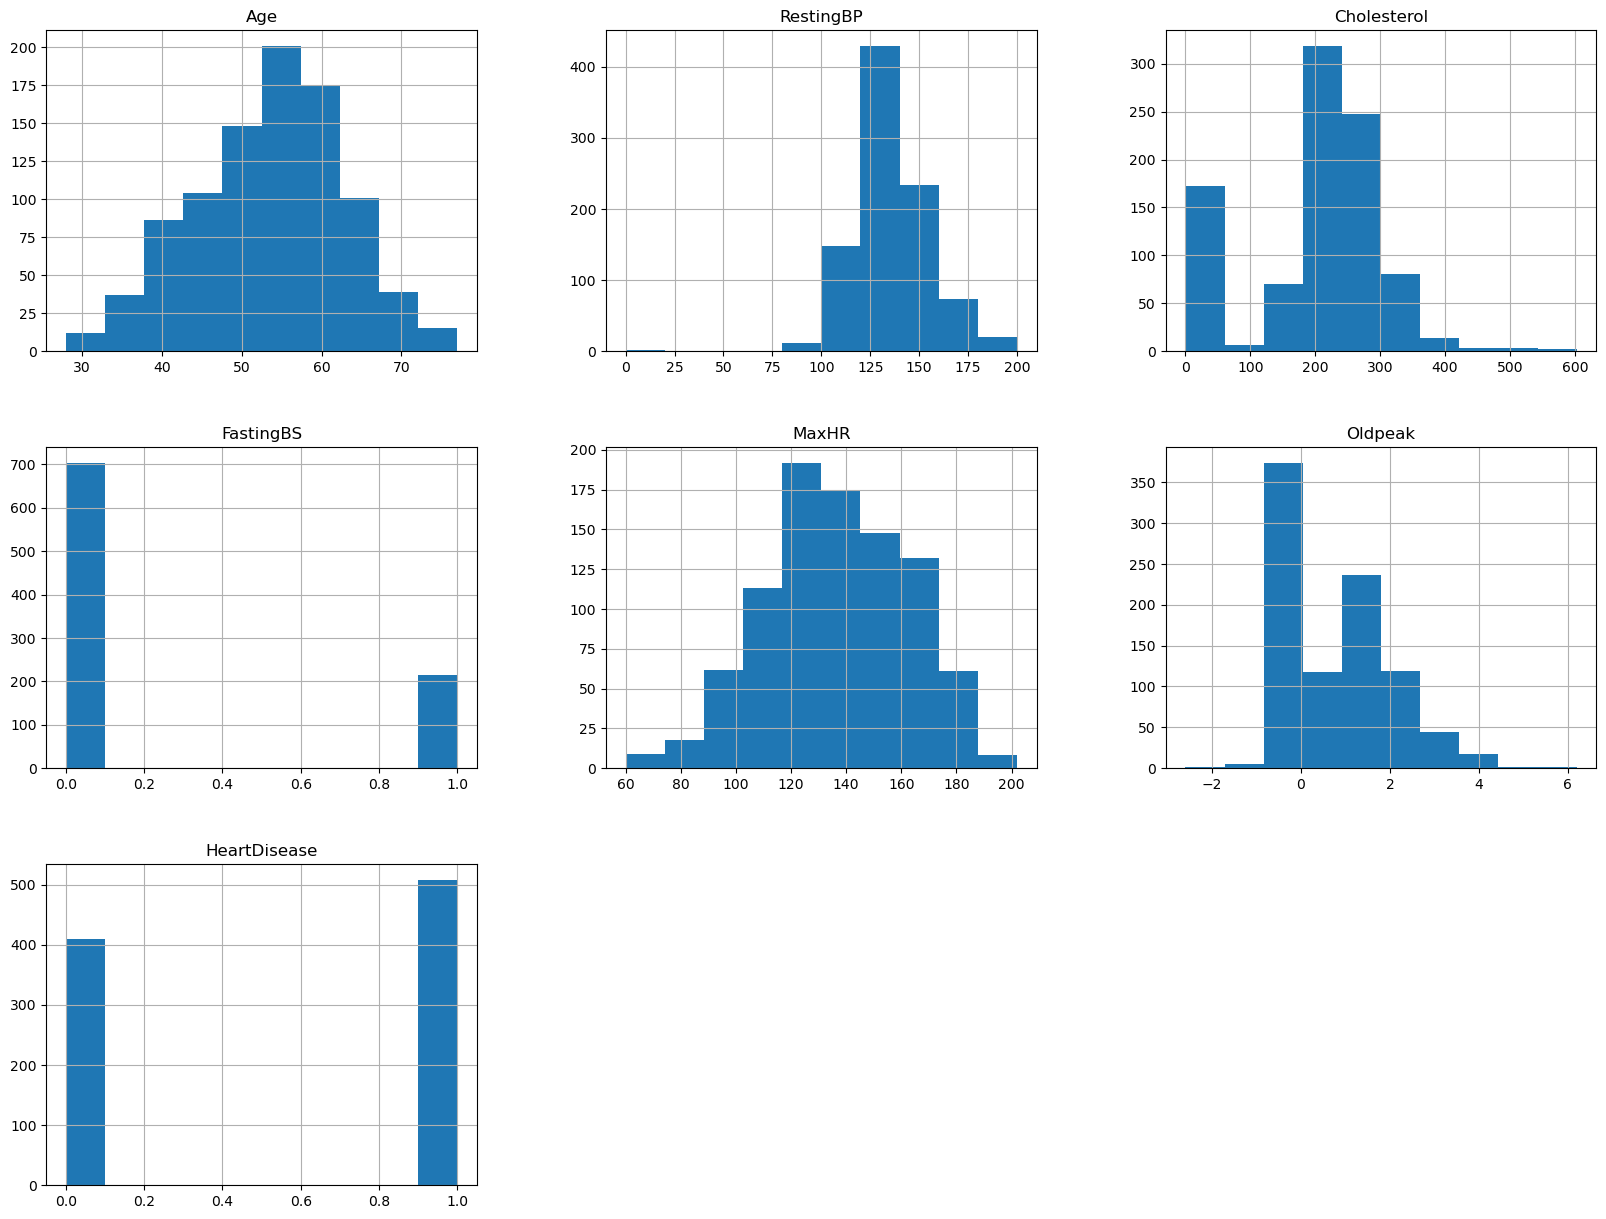

In [47]:
DATA.hist(figsize=(20,15))
plt.show()

In [62]:
# Select only numeric columns
numeric_data = DATA.select_dtypes(include=[float, int])

# Compute the correlation matrix
cor = numeric_data.corr()


<Axes: >

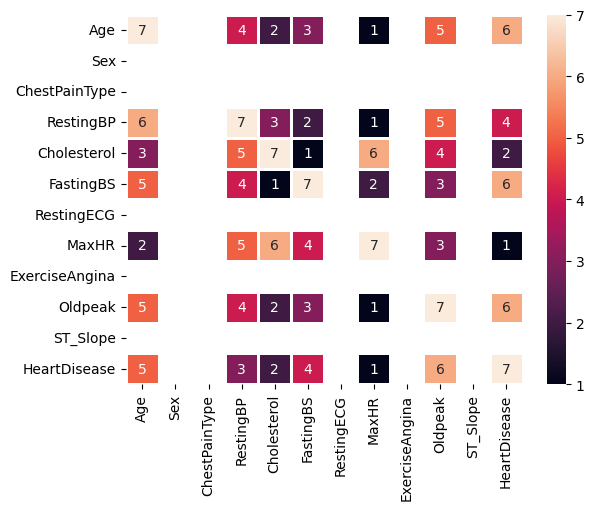

In [63]:
sns.heatmap(cor.rank(axis='columns'),annot=True,linewidths=1
            )

PROCISSING DATA

In [64]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()

In [67]:

obj = DATA.select_dtypes(include='object')
non_obj = DATA.select_dtypes(exclude='object')


In [69]:
for i in range(0,obj.shape[1]):
    obj.iloc[:,i]=lab.fot_transform(obj.iloc[:,i])

In [74]:
df=pd.concat([obj,non_obj],axis=1)


In [75]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,NaN,NaN,140,289,0,NaN,172,NaN,0.0,NaN,0
1,49,NaN,NaN,160,180,0,NaN,156,NaN,1.0,NaN,1
2,37,NaN,NaN,130,283,0,NaN,98,NaN,0.0,NaN,0
3,48,NaN,NaN,138,214,0,NaN,108,NaN,1.5,NaN,1
4,54,NaN,NaN,150,195,0,NaN,122,NaN,0.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,NaN,NaN,110,264,0,NaN,132,NaN,1.2,NaN,1
914,68,NaN,NaN,144,193,1,NaN,141,NaN,3.4,NaN,1
915,57,NaN,NaN,130,131,0,NaN,115,NaN,1.2,NaN,1
916,57,NaN,NaN,130,236,0,NaN,174,NaN,0.0,NaN,1
